Revisit the random forest model described from Chapter 3.

Using Wine dataset (from Chapter 4), 10% test set holdout and 10 fold cross validation;

Fit a random forest model with several different values for N_estimators and report in-sample/out-of-sample accuracies. 

Display the individual feature importances of your best model using the code presented in Chapter 4 on page 136. {importances=forest.feature_importances_ }

Submit one pdf using report template provided.

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #though scaling not useful in rf
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/wine/wine.data',
         header=None)


In [10]:
wine_df.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline']

In [11]:
X, y = wine_df.iloc[:, 1:].values, wine_df.iloc[:, 0].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size  = 0.1, random_state = 0, stratify = y)

[0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334]


Text(0.5,1,'rf_cv')

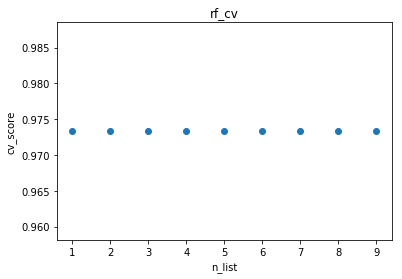

In [35]:
#Construct estimator lsit
n_list = np.arange(1,10,1)
param_grid = {'n_estimators':n_list}


scores_in = []
for i in n_list:
    forest = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1, n_jobs = 2)
    forest.fit(X_train, y_train)
    score_in = (cross_val_score(forest, X_train, y_train, cv = 10))    
    scores_in.append(score)

#print(scores_in)
plt.scatter(n_list, np.array(scores))

plt.ylabel('cv_score')
plt.xlabel('n_list')
plt.title('rf_cv')

In [46]:
import time

timed_score = []
for n in n_list:
    time_start = time.time()
    forest.n_estimators = n
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    time_elapsed = (time.time() - time_start)
    timed_score.append(accuracy_score(y_train, y_train_pred))
    print(f'computational time is {time_elapsed}')
print(timed_score)

computational time is 0.10188412666320801
computational time is 0.20375967025756836
computational time is 0.20490002632141113
computational time is 0.20550012588500977
computational time is 0.20575428009033203
computational time is 0.20610523223876953
computational time is 0.2066514492034912
computational time is 0.20666885375976562
computational time is 0.208207368850708
[0.95, 0.95625, 0.98125, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Run gridsearch

In [19]:
forest = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)
forest_gs = GridSearchCV(forest, param_grid, cv = 10)
forest_gs.fit(X_train, y_train)
print(forest_gs.best_params_)

{'n_estimators': 8}


In [21]:
#using the best n
forest_8 = RandomForestClassifier(criterion = 'gini', n_estimators = 8, random_state = 1, n_jobs =2)
forest_8.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

[ 9  6  0 12 11  5  7 10  3  8  1  4  2]


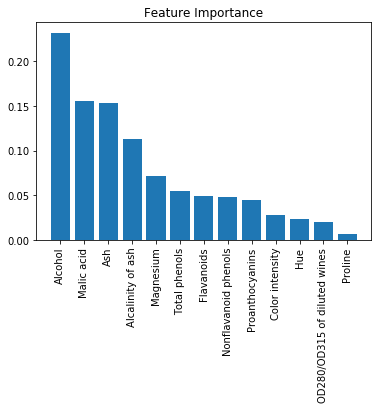

In [40]:
importances = forest_8.feature_importances_
indices = np.argsort(importances)[::-1]
print(indices)
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X_train.shape[1]), wine_df.columns[1:], rotation = 90)
plt.xlim(-1, X_train.shape[1])
plt.show()


In [32]:
print("My name is Dizhou Wu")
print("My NetID is: dizhouw2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Dizhou Wu
My NetID is: dizhouw2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
